In [1]:
import pandas as pd
import numpy as np

In [2]:
heart_data = pd.read_csv("heart_disease.csv")

In [5]:
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
heart_data.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319789.000000,319778.000000,319781.000000,319576.000000
mean,28.325348,3.371605,3.898384,7.096922
std,6.356134,7.950662,7.955291,1.436165
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [4]:
heart_data.describe(include='object')

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319721,319680,319774,319762,319482,319751,319756,319762,319779,319302,319795,319778,319795
unique,2,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,187843,297908,307706,275363,167591,34143,245189,269626,247946,113657,276923,308001,289976


In [6]:
heart_data.isna().sum()

HeartDisease          0
BMI                   6
Smoking              74
AlcoholDrinking     115
Stroke               21
PhysicalHealth       17
MentalHealth         14
DiffWalking          33
Sex                 313
AgeCategory          44
Race                 39
Diabetic             33
PhysicalActivity     16
GenHealth           493
SleepTime           219
Asthma                0
KidneyDisease        17
SkinCancer            0
dtype: int64

In [7]:
heart_data['BMI'].fillna(heart_data['BMI'].median(),inplace=True)

In [8]:
heart_data['PhysicalHealth'].fillna(heart_data['PhysicalHealth'].median(),inplace=True)
heart_data['MentalHealth'].fillna(heart_data['MentalHealth'].median(),inplace=True)
heart_data['SleepTime'].fillna(heart_data['SleepTime'].median(),inplace=True)

In [9]:
heart_data['Smoking'].fillna(heart_data['Smoking'].mode()[0],inplace=True)

In [10]:
heart_data['AlcoholDrinking'].fillna(heart_data['AlcoholDrinking'].mode()[0],inplace=True)
heart_data['Stroke'].fillna(heart_data['Stroke'].mode()[0],inplace=True)
heart_data['DiffWalking'].fillna(heart_data['DiffWalking'].mode()[0],inplace=True)
heart_data['Sex'].fillna(heart_data['Sex'].mode()[0],inplace=True)
heart_data['AgeCategory'].fillna(heart_data['AgeCategory'].mode()[0],inplace=True)
heart_data['Race'].fillna(heart_data['Race'].mode()[0],inplace=True)
heart_data['Diabetic'].fillna(heart_data['Diabetic'].mode()[0],inplace=True)
heart_data['PhysicalActivity'].fillna(heart_data['PhysicalActivity'].mode()[0],inplace=True)
heart_data['GenHealth'].fillna(heart_data['GenHealth'].mode()[0],inplace=True)
heart_data['KidneyDisease'].fillna(heart_data['KidneyDisease'].mode()[0],inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
label_enc = LabelEncoder()

In [13]:
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

In [19]:
for col in columns:
    heart_data[col]=label_enc.fit_transform(heart_data[col])

In [20]:
heart_data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [21]:
target_distribution = heart_data['HeartDisease'].value_counts(normalize=True)

In [23]:
heart_data.isna().sum(),target_distribution

(HeartDisease        0
 BMI                 0
 Smoking             0
 AlcoholDrinking     0
 Stroke              0
 PhysicalHealth      0
 MentalHealth        0
 DiffWalking         0
 Sex                 0
 AgeCategory         0
 Race                0
 Diabetic            0
 PhysicalActivity    0
 GenHealth           0
 SleepTime           0
 Asthma              0
 KidneyDisease       0
 SkinCancer          0
 dtype: int64,
 HeartDisease
 0    0.914405
 1    0.085595
 Name: proportion, dtype: float64)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
sns.set(style="whitegrid")

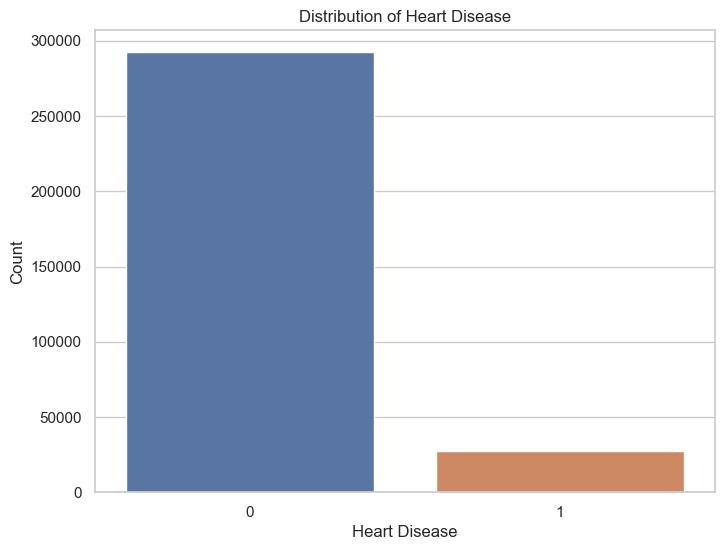

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=heart_data)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'AgeCategory')

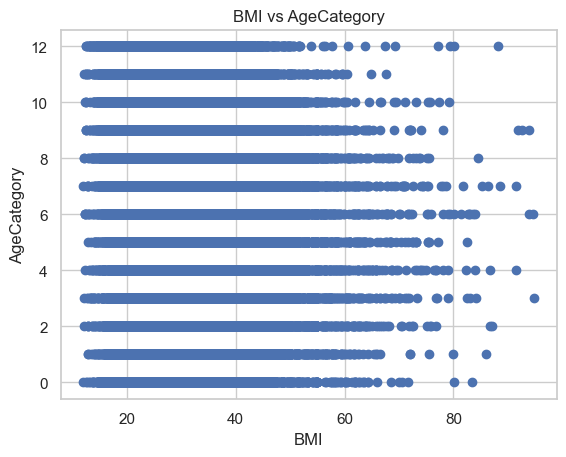

In [32]:
plt.scatter(heart_data['BMI'],heart_data['AgeCategory'])
plt.title('BMI vs AgeCategory')
plt.xlabel('BMI')
plt.ylabel('AgeCategory')

Text(0, 0.5, 'MentalHealth')

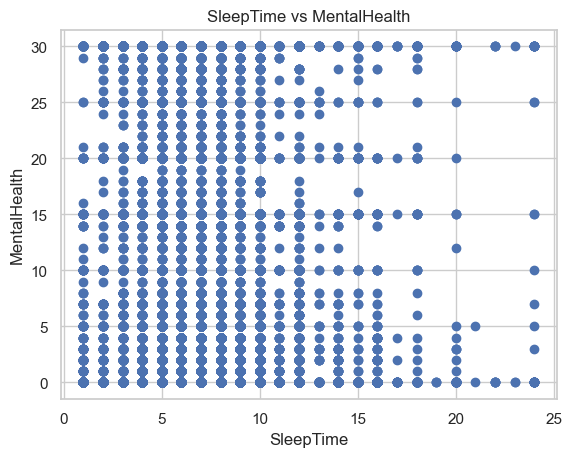

In [33]:
plt.scatter(heart_data['SleepTime'],heart_data['MentalHealth'])
plt.title('SleepTime vs MentalHealth')
plt.xlabel('SleepTime')
plt.ylabel('MentalHealth')

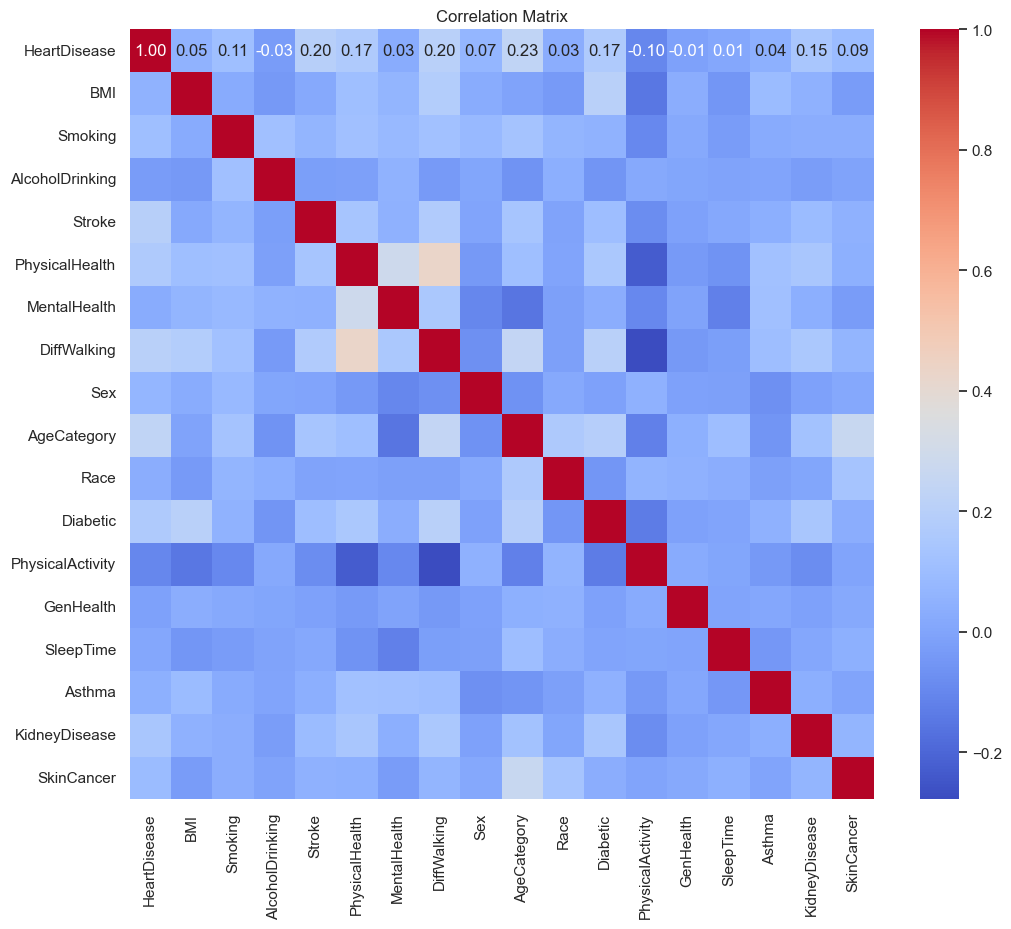

In [34]:
plt.figure(figsize=(12, 10))
correlation_matrix = heart_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'PhysicalHealth')

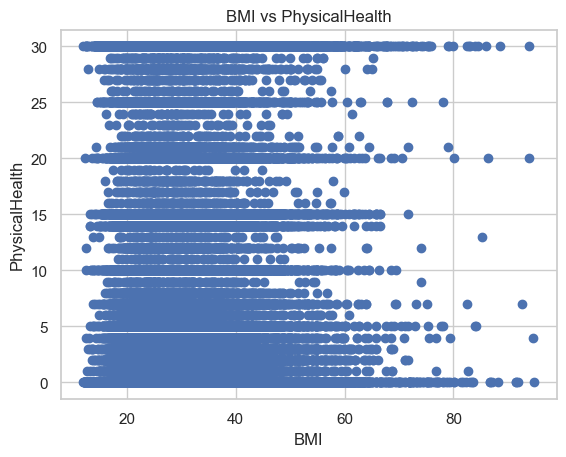

In [35]:
plt.scatter(heart_data['BMI'],heart_data['PhysicalHealth'])
plt.title('BMI vs PhysicalHealth')
plt.xlabel('BMI')
plt.ylabel('PhysicalHealth')

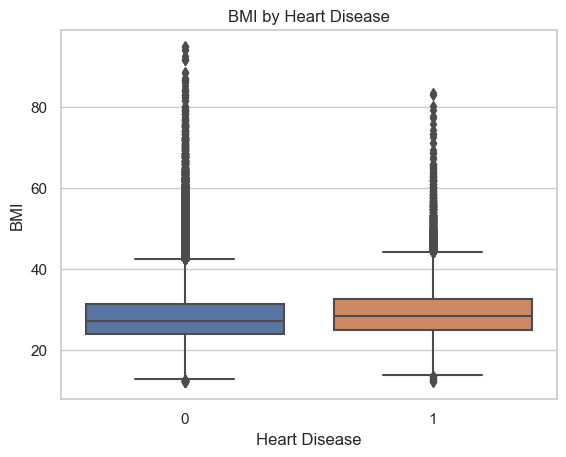

In [36]:
sns.boxplot(x='HeartDisease', y='BMI', data=heart_data)
plt.title('BMI by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('BMI')
plt.show()

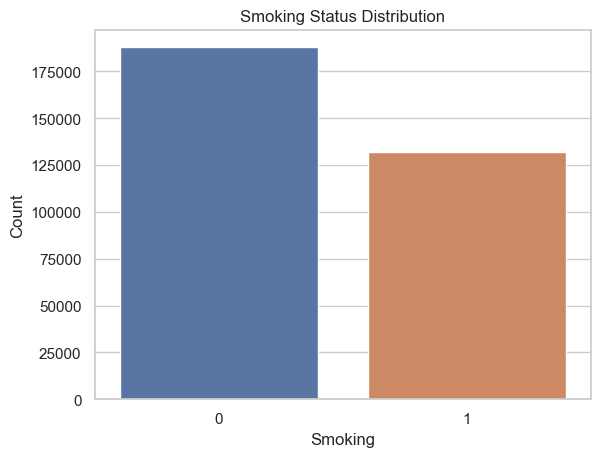

In [37]:
sns.countplot(x='Smoking', data=heart_data)
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()